In [2]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from scripts import project_functions

df = project_functions.import_and_clean()
project_functions.eda(df)

Rows, Columns
 (827, 15)

First Five rows
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1  2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2  2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3  2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4  2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2 

**Observations**

*1:* The average temperature in this Italian city was 15.6°C. During all the time when data was being recorded, it never dropped below freezing and the highest temperature recorded was 30°C

*2:* Despite several of the PT08 columns being aesthetically similar, they each refer to much different things. These are Tin Oxide (PT08.S1), Titania (PT08.S2), Tungsten Oxide (PT08.S3(NOx) and PT08.S4(NO2)) and Indium Oxide (PT08.S5(O3)). These variables aren't measured in the same way that CO(GT), NMHC(GT), C6H6(GT), etc are measured but rather by an averaged sensor response. The parentheses at the end of PT08 likely refer to its related measured variable (Measured in micromg/m^3 or mg/m^3) If you use the two of them in conjunction, you would likely be able to find out how much of a particular type of PT08 is present.

*3:* Errors are represented in the dataset as -200. After eliminating these, there remain only 857 rows. A decrease of 91% from the original set (9358 entries). 

<AxesSubplot:xlabel='Date', ylabel='T'>

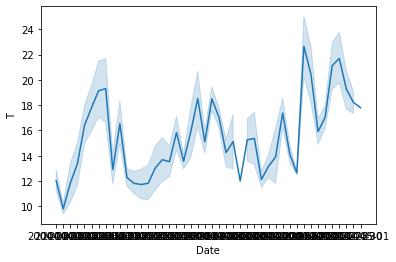

In [22]:
plot1 = sns.lineplot(data=df, x="Date", y="T")
plot1
#This is a plot of the temperature over time. While the endpoint is noticeably higher than the startpoint, this can
#be attributed to a change in seasons (i.e. spring to summer) or a sudden warming. The data with removed rows only covers 
#44 days.

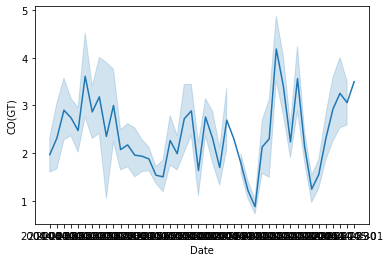

In [23]:
plot2 = sns.lineplot(data=df, x="Date", y="CO(GT)")
#Carbon monoxide over time. 

<AxesSubplot:>

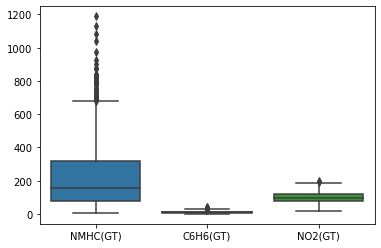

In [26]:
df2 = df[["NMHC(GT)","C6H6(GT)","NO2(GT)"]]
sns.boxplot(data=df2)
#Determine which type of pollution is most significant from Non Metanic HydroCarbons, Benzene and Nitrogen Dioxide
#Of course, NHMCs are the most prevalent, given that they are comprised by numerous hydrocarbons. 
#Some examples include propane and ethane